# T2.4: Métodos de clustering basados en densidad


En esta práctica vamos a ver los métodos de clustering basados en densidad. En concreto, el DBSCAN y el Mean-Shift. Vamos primero con el DBSCAN:


# DBSCAN

Lo primero es cargar las librerías necesarias y crear el dataset de ejemplo:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generamos nuestro dataset
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2)) # para "estirar" los datos
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Vamos a, antes que nada, realizar el preprocesado necesario para que todas las variables tengan la misma escala. Para ello, vamos a utilizar:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
## Aquí tu código ##

Vamos a visualizarlo:

In [ ]:
# plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Vale, ya tenemos los datos en la misma escala para ambas variables. **Recordad que este primer paso es MUY importante** para obtener un agrupamiento correcto.

Vamos a ver, lo primero, como se comportaría el K-means con este conjunto de datos que a priori no parece demasiado complicado.

In [ ]:
# cluster the data into five clusters

## Aquí tu código ##


# plot the cluster assignments and cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="jet")
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^',
            c=[0, 1, 2, 3, 4],
            s=100,
            linewidth=2,
            edgecolor='black',
            cmap="jet")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Fijaos que debido a que el k-means está diseñado para trabajar con la distancia Euclidea, no lidia bien con datos con una covarianza alta (recordad la primera lección).

Una forma de arreglar esto era utilizar la distancia de Mahalanobis, que no deja de ser una generalización de la distancia Euclidea que tiene en cuenta las covarianzas de los datos. Sois libres de probar y contarme los resultados, que a priori, deberían ser buenos.

Sin embargo, nosotros vamos a utilizar la recién aprendida técnica de clustering basado en densidad: DBSCAN.

Vamos a importar los paquetes necesarios:

In [ ]:
from sklearn.cluster import DBSCAN

Vamos ahora a clusterizar los datos usando el DBSCAN:

In [ ]:
# cluster the data into five clusters
## Aquí tu código ##

Y a visualizarlos:

In [ ]:
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Fijaos cómo encuentra los 5 grupos, y además unos cuantos outliers. Esta es una característica del DBSCAN que no hemos visto que tenga ningún otro método de clustering hasta el momento, así que quedaos con ella, pues os puede ser útil en el futuro.

Aunque tenemos claro qué agrupamiento es el mejor, vamos a compararlos cuantitativamente:

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(y, y_pred))

#DBSCAN performance:
print("ARI =", adjusted_rand_score(y, clusters))

¡Fijaos en la diferencia! Volvemos a ver la importancia de elegir correctamente el método de agrupamiento según los datos que tengamos.

Vamos a ver ahora una librería interesante que nos permite ver distintas ejecuciones del DBSCAN con distintos parámetros, muy útil para hacernos una idea de cómo influyen dichos parámetros.

In [ ]:
!pip install mglearn
import mglearn

In [ ]:
mglearn.plots.plot_dbscan()

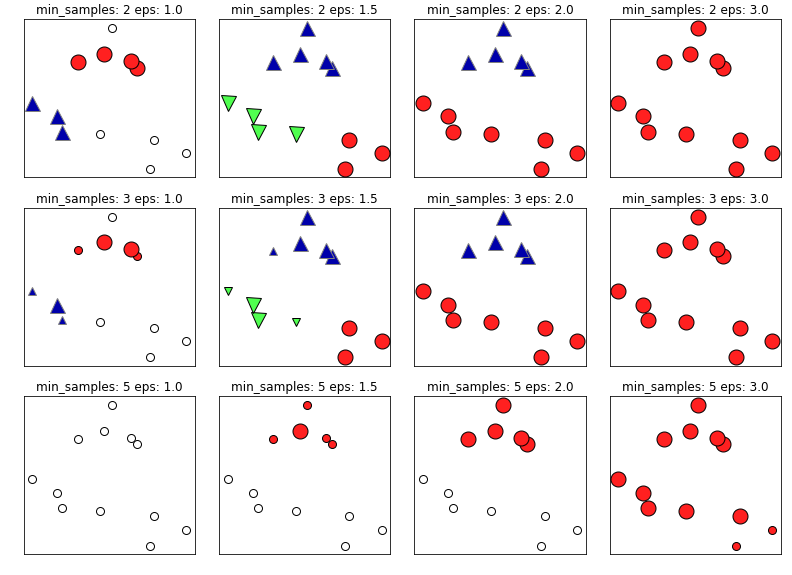

Fijaos que esta librería tiene más cosas interesantes, como por ejemplo esta función que muestra el progreso de un k-means:

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

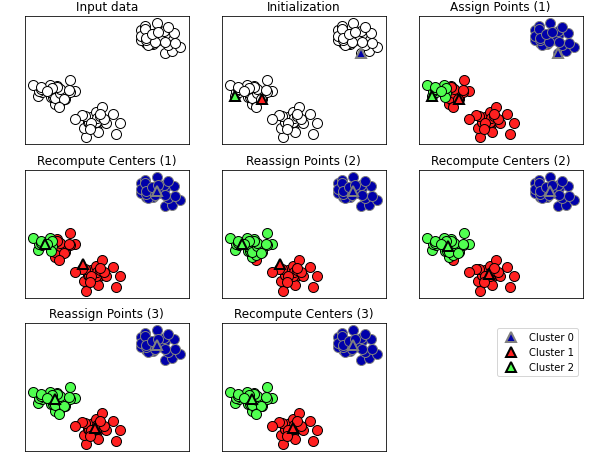

Aunque sin duda alguna, la mejor herramienta que conozco para visualizar es esta:

- DBSCAN: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- k-means: https://www.naftaliharris.com/blog/visualizing-k-means-clustering

Solo tiene para estos dos algoritmos, pero merece la pena muchisimo echarle un vistazo.

FUENTE: https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

EJEMPLO DIDÁCTICO: https://github.com/qingkaikong/blog/tree/master/28_DBSCAN

# Mean shift

Vamos a ver ahora un ejemplo del Mean shift.

Recordad que el modo de funcionamiento del Mean shift es el siguiente:

<img src="https://spin.atomicobject.com/wp-content/uploads/mean_shift_points.png" width="600px">
<img src="https://spin.atomicobject.com/wp-content/uploads/example_kde_2.png" width="600px">
<img src="https://raw.githubusercontent.com/mattnedrich/MeanShift_py/master/sample_images/ms_2d_bw_2.gif" width="600px">
<img src="https://raw.githubusercontent.com/mattnedrich/MeanShift_py/master/sample_images/ms_2d_bw_.8.gif" width="600px">




In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image

In [ ]:
# generamos el dataset
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# calculamos el mean shift

# vamos a calcular el ancho de banda "h" automáticamente
bandwidth = estimate_bandwidth(X, quantile=.1, n_samples=500)
print(f'Ancho de banda estimado: {bandwidth}')

Ancho de banda estimado: 0.8200385018438175


In [ ]:
# aplicamos el mean shift

ms =## Aquí tu código ##
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = labels.max()+1

In [ ]:
#%% Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Segmentación de imágenes

Vamos a tratar ahora de usar el mean shift para segmentar la siguiente imagen:

<img src="https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg" width="600">


In [ ]:
# adquirimos la imagen
import requests
url = 'https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image = np.array(image)
print(image.shape)

(750, 1000, 3)


In [ ]:
# lo convertimos a algo que entienda nuestro mean shift: (HxW) pixels x 3

flat_image = np.reshape(image, [-1, 3])

# estimamos el ancho de banda de la gaussiana automáticamente
bandwidth = estimate_bandwidth(flat_image, quantile=.2, n_samples=500)
print(f'Ancho de banda estimado: {bandwidth}')

In [ ]:
# aplicamos el mean shift

## Aquí tu código ##

labels=ms.labels_

In [ ]:
# Ploteamos la imagen original y la segmentada
plt.figure(2, figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [750,1000]))
plt.axis('off')

Fijandonos en el bandwidth estimado, podemos probar diferentes valores y ver lo que ocurre:

In [ ]:
# aplicamos el mean shift

## Aquí tu código ##

labels=ms.labels_

# Ploteamos la imagen original y la segmentada
plt.figure(2, figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [750,1000]))
plt.axis('off')

In [ ]:
# aplicamos el mean shift

## Aquí tu código ##

labels=ms.labels_

# Ploteamos la imagen original y la segmentada
plt.figure(2, figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [750,1000]))
plt.axis('off')

Y aquí podemos ver una visualización de lo que está ocurriendo:

<img src="https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/ms_3d_image_animation.gif" width="600">

FUENTE: https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/